In [12]:
# read the data into a Pandas DataFrame
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']
pima = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names, skiprows=1)

In [13]:
# print the first 5 rows of data from the dataframe
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- label
 - 1: diabetes
 - 0: diabetes
- pregnant
 - number of times pregnant

Question: Can we predict the diabetes status of a patient given their health measurements?

In [16]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima.label

In [17]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

C:\Users\Paschal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [20]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


Classification accuracy is 69%

**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

- We must always compare with this

In [21]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [22]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.3229166666666667

In [23]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [24]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

This means that a dumb model that always predicts 0 would be right 68% of the time

- This shows how classification accuracy is not that good as it's close to a dumb model
- It's a good way to know the minimum we should achieve with our models

In [25]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

Comparing the **true** and **predicted** response values

In [27]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
False: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
 - We examine by calculating the null accuracy
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion matrix

Table that describes the performance of a classification model

In [28]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


- Every observation in the testing set is represented in **exactly one box**
- It's a 2x2 matrix because there are **2 response classes**
- The format shown here is **not** universal
 - Take attention to the format when interpreting a confusion matrix

**Basic terminology**

- **True Positives (TP):** we correctly predicted that they do have diabetes
 - 15
- **True Negatives (TN):** we correctly predicted that they don't have diabetes
 - 118
- **False Positives (FP):** we incorrectly predicted that they do have diabetes (a "Type I error")
 - 12
 - Falsely predict positive
 - Type I error
- **False Negatives (FN):** we incorrectly predicted that they don't have diabetes (a "Type II error")
 - 47
 - Falsely predict negative
 - Type II error

- 0: negative class
- 1: positive class

In [29]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118  12]
 [ 47  15]]


## Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [30]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


**Classification Error:** Overall, how often is the classifier incorrect?

 - Also known as "Misclassification Rate"

In [31]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- Something we want to maximize
- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
 - all positive = TP + FN

In [32]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize
- How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
 - all negative = TN + FP

In [33]:
specificity = TN / (TN + FP)

print(specificity)

0.9076923076923077


Our classifier

- Highly specific
- Not sensitive

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [34]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.09230769230769231
0.09230769230769231


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [35]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


**Conclusion:**

- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection
**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
 - Identify if FP or FN is more important to reduce
 - Choose metric with relevant variable (FP or FN in the equation)
- Spam filter (positive class is "spam"):
 - Optimize for **precision or specificity**
  - precision
   - false positive as variable
  - specificity
   - false positive as variable
 - Because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"):
 - Optimize for sensitivity
   - FN as a variable
 - Because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

## Adjusting the classification threshold

In [36]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [37]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

- Row: observation
 - Each row, numbers sum to 1
- Column: class
 - 2 response classes there 2 columns
   - column 0: predicted probability that each observation is a member of class 0
   - column 1: predicted probability that each observation is a member of class 1
- Importance of predicted probabilities
 - We can rank observations by probability of diabetes
   - Prioritize contacting those with a higher probability
- predict_proba process
 1. Predicts the probabilities
 2. Choose the class with the highest probability
- There is a 0.5 classification threshold
 1. Class 1 is predicted if probability > 0.5
 2. Class 0 is predicted if probability < 0.5

In [38]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [39]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [40]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0,0.5,'Frequency')

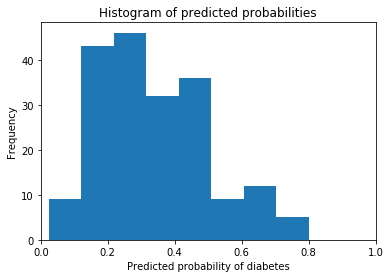

In [41]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

- We can see from the third bar
 - About 45% of observations have probability from 0.2 to 0.3
 - Small number of observations with probability > 0.5
 - This is below the threshold of 0.5
 - Most would be predicted "no diabetes" in this case
- Solution
 - **Decrease the threshold** for predicting diabetes
   - **Increase the sensitivity** of the classifier
     - This would increase the number of TP
       - More sensitive to positive instances
       - Example of metal detector
         - Threshold set to set off alarm for large object but not tiny objects
         - YES: metal, NO: no metal
         - We lower the threshold amount of metal to set it off
         - It is now more sensitive to metal
         - It will then predict YES more often

In [66]:
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [68]:
y_pred_prob.reshape(1, -1)

array([[0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
        0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438,
        0.35755557, 0.74087965, 0.36050235, 0.23012363, 0.42654231,
        0.19103515, 0.45763601, 0.1190141 , 0.43928953, 0.36961151,
        0.44187989, 0.37611662, 0.19816022, 0.41677304, 0.15548281,
        0.2531671 , 0.09743077, 0.69633712, 0.15358309, 0.2197836 ,
        0.43094832, 0.34216058, 0.22396114, 0.38073543, 0.13342134,
        0.38790216, 0.47049703, 0.16204743, 0.29548176, 0.30918161,
        0.27299705, 0.38816583, 0.27353443, 0.28881041, 0.63471914,
        0.02365251, 0.15820648, 0.23018375, 0.3484593 , 0.27580041,
        0.33264104, 0.24880596, 0.74489512, 0.39001464, 0.41625545,
        0.13575687, 0.18895376, 0.64777682, 0.18922131, 0.05685904,
        0.63991547, 0.46636382, 0.1250972 , 0.26957602, 0.24919104,
        0.30570396, 0.46376224, 0.20963095, 0.42847829, 0.40762264,
        0.20169096, 0.27027066, 0.26255856, 0.57

In [57]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize(y_pred_prob.reshape(1, -1), 0.3)[0]

In [69]:
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [70]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [71]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


- The row totals are the same
- The rows represent actual response values
 - 130 values top row
 - 62 values bottom row
- Observations from the left column moving to the right column because we will have more TP and FP

In [72]:
# sensitivity has increased (used to be 0.24)
print (46 / float(46 + 16))

0.7419354838709677


In [73]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**
 - Increasing one would always decrease the other
- Adjusting the threshold should be one of the last step you do in the model-building process
 - The most important steps are
    - Building the models
    - Selecting the best model

## Receiver Operating Characteristic (ROC) Curves

**Question:** Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer:** Plot the ROC curve.

- Receiver Operating Characteristic (ROC)

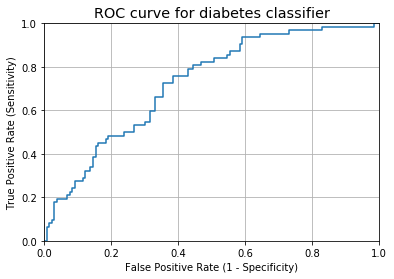

In [74]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the thresholds** used to generate the curve on the ROC curve its

In [75]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [76]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [77]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


## AUC

AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [78]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


- AUC is useful as a **single number summary** of classifier performance
- Higher value = better classifier
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy)
 - Fraud case
    - Null accuracy almost 99%
    - AUC is useful here

In [80]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\Paschal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Paschal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Paschal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Paschal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Paschal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

0.7378233618233618

Use both of these whenever possible

1. **Confusion matrix advantages:**

 - Allows you to calculate a **variety of metrics**
 - Useful for **multi-class problems** (more than two response classes)
2. **ROC/AUC advantages:**

 - Does not require you to **set a classification threshold**
 - Still useful when there is **high class imbalance**